# Tomato Plant Disease Classification using deep learning 

Data Credits:  https://www.kaggle.com/datasets/arjuntejaswi/plant-village

# Import all the neccessary dependencies  

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

# Import data into tensorflow dataset object
Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/

In [4]:
!splitfolders --ratio 0.8 0.1 0.1 -- "C:\Users\DAAH\Downloads\cnn_model\plant village"

# Setting Constants 

In [5]:
IMAGE_SIZE = 256
CHANNELS = 3

# Augmented image training data generation
we use ImageDataGenerator class from the TensorFlow library, for augmenting training image data, applying rescaling, rotation, and horizontal flipping to the images. By using the flow_from_directory() method, we load our training images, we resize them into 256x256 pixels and create to them 32 batch size 

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 12804 images belonging to 10 classes.


In [7]:
# Mapping class names with their corresponding class index values 
train_generator.class_indices

{'Tomato Bacterial spot': 0,
 'Tomato Early blight': 1,
 'Tomato Late blight': 2,
 'Tomato Leaf Mold': 3,
 'Tomato Septoria leaf spot': 4,
 'Tomato Spider mites Two spotted spider mite': 5,
 'Tomato Target Spot': 6,
 'Tomato Tomato Yellow Leaf Curl Virus': 7,
 'Tomato Tomato mosaic virus': 8,
 'Tomato healthy': 9}

In [8]:
# displaying our class names, the ten tomato diseases 
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato Bacterial spot',
 'Tomato Early blight',
 'Tomato Late blight',
 'Tomato Leaf Mold',
 'Tomato Septoria leaf spot',
 'Tomato Spider mites Two spotted spider mite',
 'Tomato Target Spot',
 'Tomato Tomato Yellow Leaf Curl Virus',
 'Tomato Tomato mosaic virus',
 'Tomato healthy']

In [9]:
count = 0
for image_batch, label_batch in train_generator:
    print(label_batch)  # Print the batch of labels
    print(image_batch[0])  # Print the first image in the batch
    break  # Exit the loop after the first iteration to demonstrate the output
#     count+=1
#     if count>2:
#         break

[5. 0. 1. 0. 9. 9. 0. 6. 4. 2. 3. 6. 4. 9. 5. 7. 9. 0. 6. 6. 9. 9. 3. 2.
 0. 4. 2. 2. 6. 7. 9. 7.]
[[[0.67119884 0.64766943 0.6633557 ]
  [0.6477465  0.6242171  0.63990337]
  [0.6241206  0.6005912  0.61627746]
  ...
  [0.427451   0.3803922  0.39607847]
  [0.427451   0.3803922  0.39607847]
  [0.427451   0.3803922  0.39607847]]

 [[0.66561085 0.64208144 0.6577677 ]
  [0.65395546 0.63042605 0.6461123 ]
  [0.62722504 0.60369563 0.6193819 ]
  ...
  [0.4475447  0.40048587 0.41617215]
  [0.45437458 0.40731573 0.42300203]
  [0.4612044  0.4141456  0.42983186]]

 [[0.6600228  0.6364934  0.65217966]
  [0.6601644  0.636635   0.6523213 ]
  [0.63032955 0.60680014 0.6224864 ]
  ...
  [0.45992485 0.41286603 0.4285523 ]
  [0.45619947 0.40914065 0.42482692]
  [0.45247412 0.40541527 0.42110154]]

 ...

 [[0.57893014 0.5318713  0.5867733 ]
  [0.5671331  0.5200743  0.57497627]
  [0.5553361  0.5082773  0.56317925]
  ...
  [0.44926143 0.39828104 0.43357515]
  [0.4601139  0.40913352 0.44442764]
  [0.47552526 

# Generating augmented images for validation using ImageDataGenerator from TensorFlow library

In [10]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1597 images belonging to 10 classes.


# Generating augmented model testing images 

In [11]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1610 images belonging to 10 classes.


In [12]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.6040479  0.58444005 0.60796946]
  [0.57766926 0.5580614  0.58159083]
  [0.5670127  0.5474049  0.5709343 ]
  ...
  [0.49241516 0.46888575 0.48457202]
  [0.48681554 0.46328613 0.4789724 ]
  [0.48121592 0.4576865  0.4733728 ]]

 [[0.6034258  0.58381796 0.60734737]
  [0.5823356  0.5627277  0.58625716]
  [0.564213   0.54460514 0.56813455]
  ...
  [0.45678478 0.43325537 0.44894165]
  [0.45896238 0.43543297 0.45111924]
  [0.46114    0.4376106  0.45329687]]

 [[0.6028036  0.58319575 0.60672516]
  [0.5870019  0.5673941  0.5909235 ]
  [0.5614131  0.54180527 0.5653347 ]
  ...
  [0.5171986  0.4936692  0.5093555 ]
  [0.5268424  0.503313   0.5189993 ]
  [0.5364862  0.5129568  0.5286431 ]]

 ...

 [[0.31764707 0.32156864 0.3372549 ]
  [0.31764707 0.32156864 0.3372549 ]
  [0.31764707 0.32156864 0.3372549 ]
  ...
  [0.3184855  0.31456393 0.33417177]
  [0.2968965  0.29297492 0.31258276]
  [0.4528647  0.44894314 0.46855098]]

 [[0.3004573  0.30437887 0.32006514]
  [0.29765752 0.3015791  0.31726536]


# Model Architecture 

We use convolutional neural network (CNN) which is popular for using image classification. first we initialize the shape of input images 256x256, color channales of images(3 colors red, bluee and green), number of classes in the classification task which is now 10. 

In [13]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [14]:
# Model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

# Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric# Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20


47/47 [==============================] - 115s 2s/step - loss: 2.1197 - accuracy: 0.2048 - val_loss: 2.4178 - val_accuracy: 0.1667
Epoch 2/20
47/47 [==============================] - 87s 2s/step - loss: 1.9948 - accuracy: 0.2646 - val_loss: 1.8691 - val_accuracy: 0.3125
Epoch 3/20
47/47 [==============================] - 124s 3s/step - loss: 1.8298 - accuracy: 0.3760 - val_loss: 1.8101 - val_accuracy: 0.4115
Epoch 4/20
47/47 [==============================] - 112s 2s/step - loss: 1.6169 - accuracy: 0.4448 - val_loss: 1.5697 - val_accuracy: 0.4531
Epoch 5/20
47/47 [==============================] - 95s 2s/step - loss: 1.3824 - accuracy: 0.5286 - val_loss: 1.2937 - val_accuracy: 0.5625
Epoch 6/20
47/47 [==============================] - 86s 2s/step - loss: 1.3125 - accuracy: 0.5346 - val_loss: 1.2165 - val_accuracy: 0.5312
Epoch 7/20
47/47 [==============================] - 98s 2s/step - loss: 1.2340 - accuracy: 0.5766 - val_loss: 1.1930 - val_accuracy: 0.5885
Epoch 8/20
47/4

In [18]:
scores = model.evaluate(test_generator)

51/51 [==============================] - 53s 1s/step - loss: 1.5961 - accuracy: 0.7149


In [20]:
scores

[1.5961410999298096, 0.7149068117141724]

# Plotting the Accuracy and Loss Curves

In [21]:
history

In [22]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [24]:
type(history.history['loss'])

list

In [25]:
len(history.history['loss'])

20

In [26]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.1196653842926025,
 1.9947679042816162,
 1.8298379182815552,
 1.6169102191925049,
 1.38240647315979]

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [28]:
val_acc

[0.1666666716337204,
 0.3125,
 0.4114583432674408,
 0.453125,
 0.5625,
 0.53125,
 0.5885416865348816,
 0.6145833134651184,
 0.7395833134651184,
 0.6041666865348816,
 0.6927083134651184,
 0.703125,
 0.6770833134651184,
 0.7916666865348816,
 0.8020833134651184,
 0.8333333134651184,
 0.8020833134651184,
 0.75,
 0.8645833134651184,
 0.8489583134651184]

In [29]:
acc

[0.2047872394323349,
 0.2646276652812958,
 0.3760162591934204,
 0.4448138177394867,
 0.5285904407501221,
 0.5345744490623474,
 0.5765582919120789,
 0.6090425252914429,
 0.6436170339584351,
 0.6605691313743591,
 0.6981382966041565,
 0.6948138475418091,
 0.7353723645210266,
 0.761303186416626,
 0.7440159320831299,
 0.7642276287078857,
 0.7792553305625916,
 0.7985372543334961,
 0.8098404407501221,
 0.7719414830207825]

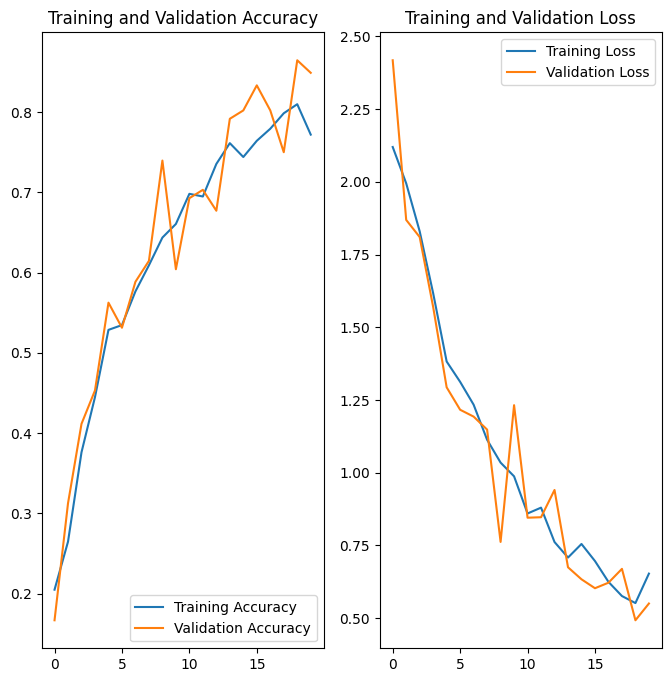

In [30]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Running prediction on a sample image

First image to predict:


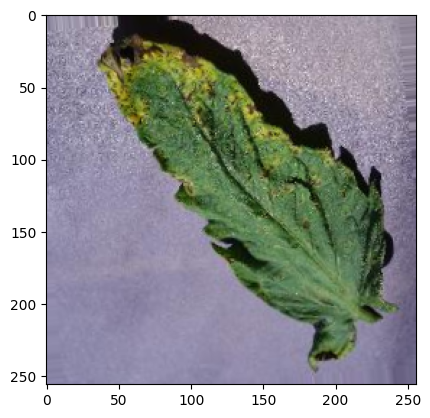

Actual label: Tomato Septoria leaf spot
1/1 [==============================] - 1s 897ms/step
Predicted label: Tomato Septoria leaf spot


In [31]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("First image to predict:")
    plt.imshow(first_image)
    plt.show()

    print("Actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])
    
    break

# Writing a function for inference

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# Now run inference on few sample images

1/1 [==============================] - 0s 31ms/step


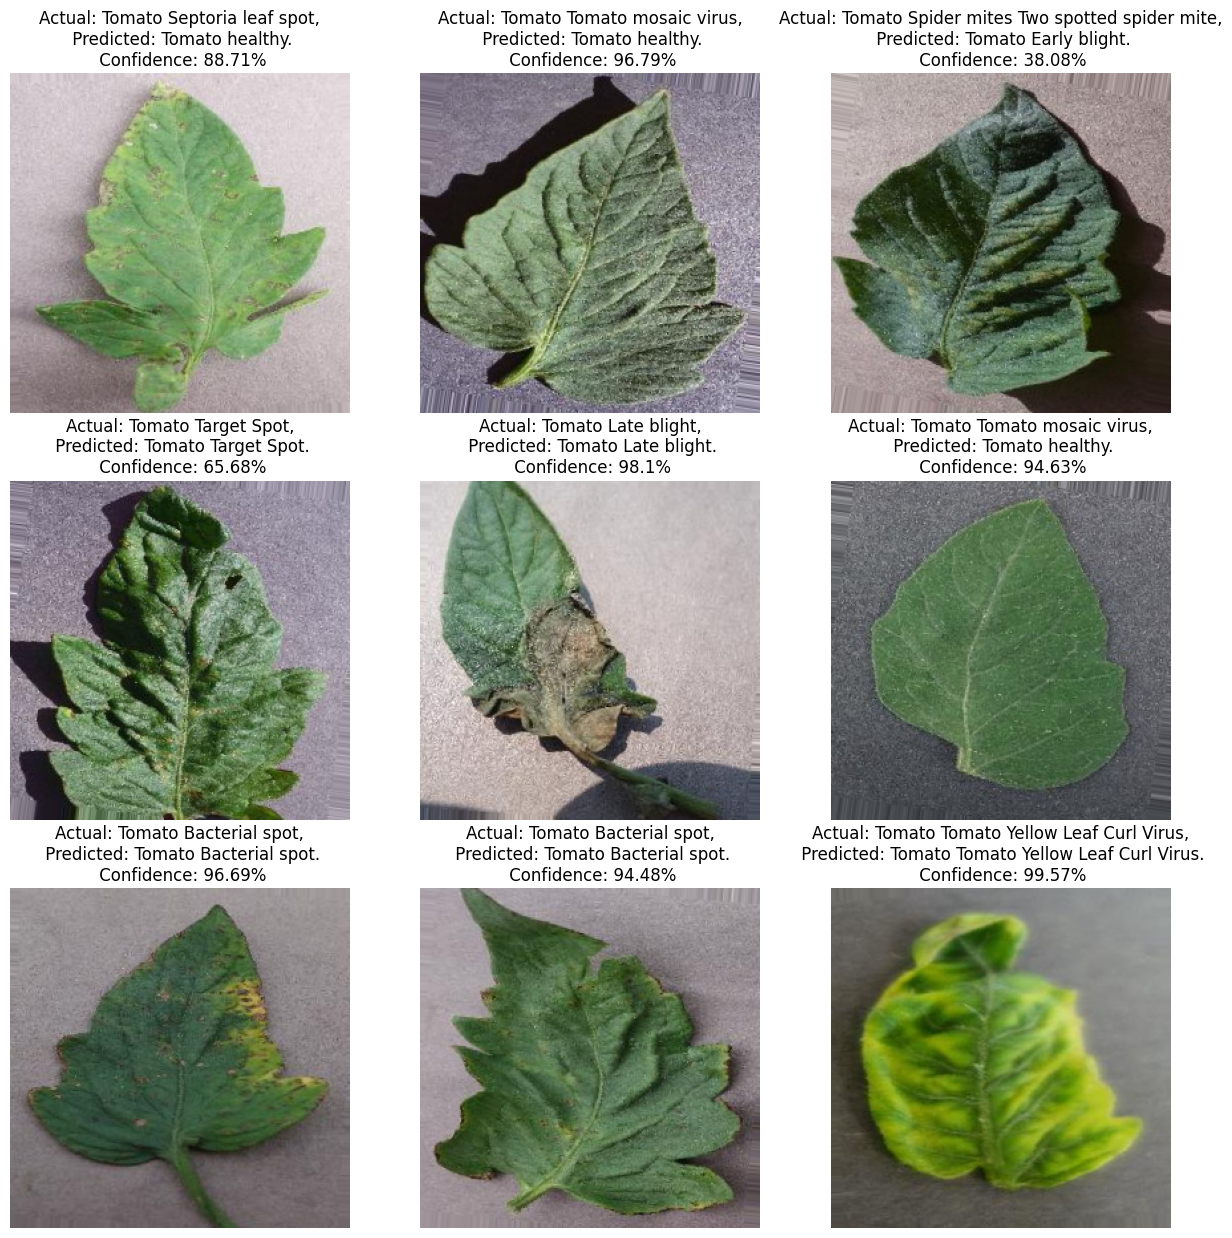

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

# Saving the Model
Save model in keras format so that there is just one file and we can upload that to GCP conveniently

In [35]:
model.save("../tomato.h5")

C:\Users\DAAH\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
